In [3]:
import numpy as np
import matplotlib.pyplot as plt
import noise
from stl import mesh
from scipy import interpolate
from scipy.spatial import Delaunay

In [8]:
def createWorld():
    
    
    shape = (100,1)
    scale = 100
    octaves = 10
    persistence = 0.5
    lacunarity = 2
    seed = np.random.randint(0,100)
    
    world = np.zeros(shape)
    
    x_idx = np.linspace(0,500, shape[0])
    y_idx = np.linspace(-1,1,2)
    
    world_x, world_y = np.meshgrid(x_idx, y_idx)
    
    world = np.vectorize(noise.pnoise2)(x_idx/scale,
                                       0.0,
                                        octaves = octaves,
                                        persistence = persistence,
                                        lacunarity = lacunarity,
                                        repeatx = 500,
                                        repeaty = 500,
                                        base = seed)
    world = np.array([world, world])
    
    return world_x, world_y, world

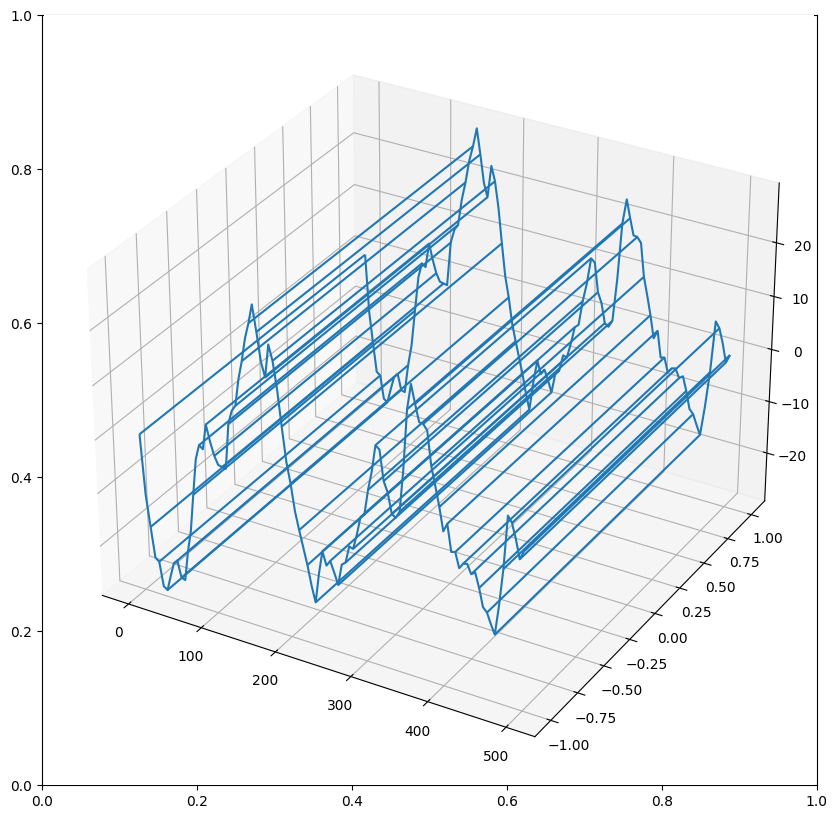

In [9]:
z_scale = 100
world_x, world_y, world = createWorld()

fig, ax = plt.subplots(1,1, figsize=(10,10))
ax = plt.axes(projection='3d')
ax.plot_wireframe(world_x, world_y, world*z_scale)

In [11]:
points = np.array([world_x.ravel(), world_y.ravel(), world.ravel()*z_scale]).T
tris = Delaunay(points[:,0:2])
cube = mesh.Mesh(np.zeros(tris.simplices.shape[0], dtype=mesh.Mesh.dtype))

for i,f in enumerate(tris.simplices):
    for j in range(3):
        cube.vectors[i][j] = points[f[j],:]
        
cube.save('stlTest.stl')